In [2]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

## Dataset

In [3]:
df = pd.read_csv('online_shoppers_intention.csv')

In [4]:
df.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0.0,0.0,0.0,0.0,2.0,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0.0,0.0,0.0,0.0,3.0,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [5]:
df.shape

(12330, 18)

## Explication des variables

The dataset consists of features belonging to 12,330 sessions.

Une session désigne une visite individuelle, initiée par un utilisateur. Une session est définie comme l’ensemble des interactions d’un utilisateur dans un laps de temps donné sur votre site web. Dans Google Analytics, les sessions sont donc la somme de l’ensemble des sessions individuelles initiées par des visiteurs. Une session prend fin après 30 minutes d’inactivité de la part du visiteur sur votre site, si la journée touche à sa fin, ou encore s’il quitte le site et ne revient pas dans les 30 minutes suivantes. Si le visiteur quitte le site et revient dans les 30 minutes qui suivent, alors Google ne comptabilise qu’une seule session.

The dataset was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period.

The dataset consists of 10 numerical and 8 categorical attributes. The 'Revenue' attribute can be used as the class label.

In [6]:
df_all = df

## Clean dataset

### 1. Delete all null values from the dataset


In [7]:
# Drop null values
df_all.dropna(inplace=True)
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12316 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12316 non-null float64
Administrative_Duration    12316 non-null float64
Informational              12316 non-null float64
Informational_Duration     12316 non-null float64
ProductRelated             12316 non-null float64
ProductRelated_Duration    12316 non-null float64
BounceRates                12316 non-null float64
ExitRates                  12316 non-null float64
PageValues                 12316 non-null float64
SpecialDay                 12316 non-null float64
Month                      12316 non-null object
OperatingSystems           12316 non-null int64
Browser                    12316 non-null int64
Region                     12316 non-null int64
TrafficType                12316 non-null int64
VisitorType                12316 non-null object
Weekend                    12316 non-null bool
Revenue                    12316 non-null bool
dtypes:

## Data cleaning
* retirer les valeurs aberrantes: "product related duration" = nombre de produits vus trop élevés(scarpping)
* retirer les gens qui ne sont pas resté sur le site : aucune action le site


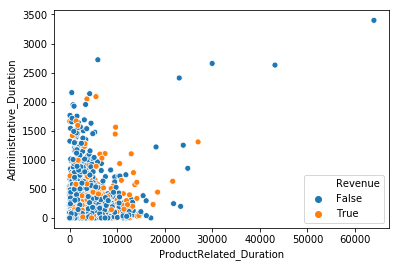

In [8]:
#on retire les valeurs aberrantes vision de produits
ProdDuration = sns.scatterplot(x="ProductRelated_Duration", y="Administrative_Duration", hue="Revenue", data=df_all)

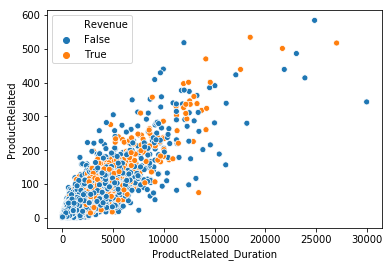

In [9]:
#cleaning en enlevant les valeurs aberrantes
df_clean = df_all[(df_all["ProductRelated"] < 600) & (df_all["ProductRelated_Duration"] < 30000)]
ProdDuration_CLEAN = sns.scatterplot(x="ProductRelated_Duration", y="ProductRelated", hue="Revenue", data=df_clean)

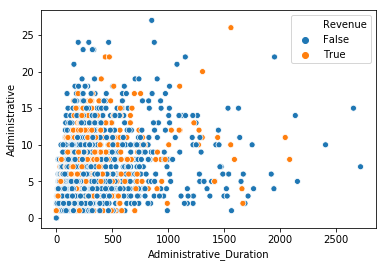

In [10]:
#clean des outliers
AdminDuration_CLEAN = sns.scatterplot(x="Administrative_Duration", y="Administrative", hue="Revenue", data=df_clean)

In [11]:
df_clean = df_clean[(df_clean["Administrative_Duration"] < 2250)]

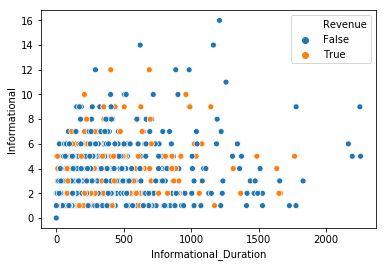

In [12]:
information_duration = sns.scatterplot(x="Informational_Duration", y="Informational", hue="Revenue", data=df_clean)

In [13]:
#enlever  les visiteurs qui sont restés très longtemps sur les pages infos et pas sur les produits(pas des consommateurs à priori)
df_clean = df_clean[(df_clean["Informational_Duration"] < 2000)]


In [14]:
# visiteurs ne sont pas allés sur des pages catégorisés donc l'analyse de leur comportement est impossible
df_clean = df_clean[(df_clean["ProductRelated"] > 0 ) | (df_clean["Administrative"] > 0) | (df_clean["Informational"] > 0)]
print(df_clean.shape)

(12301, 18)


### 3. One hot Code "Month" and "VisitorType" columns


In [15]:
# check all the month values
print('Month: ', df_clean['Month'].unique())


Month:  ['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']


In [16]:
# use pd.concat to join the new columns with the original dataframe
df_clean = pd.concat([df,pd.get_dummies(df['Month'], prefix='Month')],axis=1)
df_clean = pd.concat([df,pd.get_dummies(df['VisitorType'], prefix='VisitorType')],axis=1)
df_all = pd.concat([df,pd.get_dummies(df['Month'], prefix='Month')],axis=1)
df_all = pd.concat([df,pd.get_dummies(df['VisitorType'], prefix='VisitorType')],axis=1)

# drop the original 'Month' column (don't need it anymore)
#df_all.drop(['Month', 'VisitorType'],axis=1, inplace=True)
df_clean.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,1,1,1,1,Returning_Visitor,False,False,0,0,1
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,...,2,2,1,2,Returning_Visitor,False,False,0,0,1
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,...,4,1,9,3,Returning_Visitor,False,False,0,0,1
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,...,3,2,2,4,Returning_Visitor,False,False,0,0,1
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,...,3,3,1,4,Returning_Visitor,True,False,0,0,1


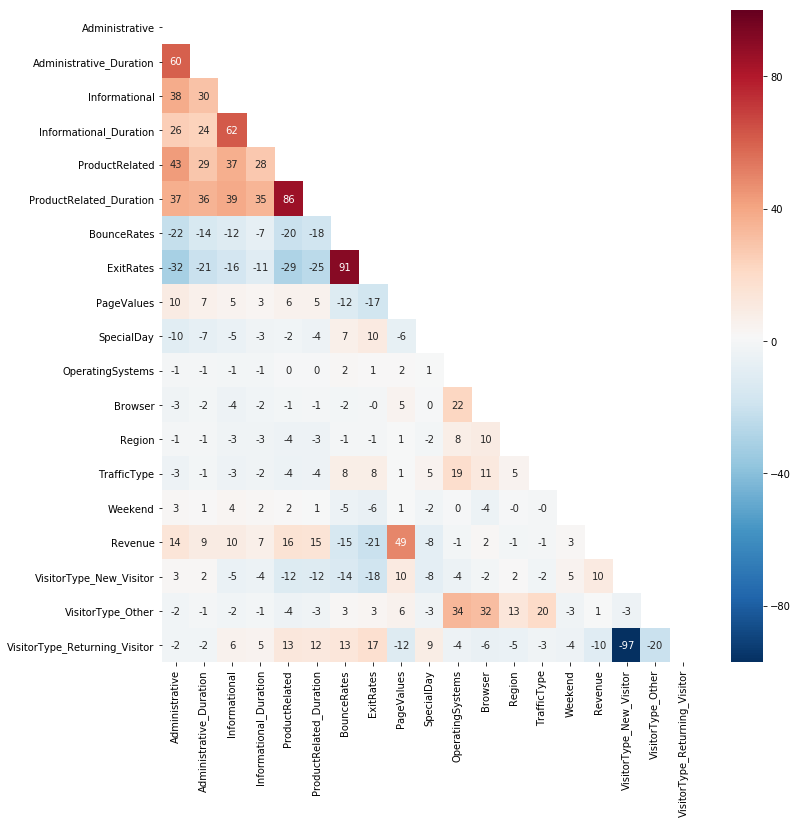

In [17]:
# Generate a mask for the upper triangle
z = np.zeros_like(df_clean.corr(), dtype=np.bool)
z[np.triu_indices_from(z)] = True

plt.figure(figsize=(12,12))
sns.heatmap(df_clean.corr()*100, mask=z, cmap="RdBu_r", annot=True, fmt='.0f')
plt.show()

## Data analysis  et Visualisation sur les données au comportement des visiteurs

In [18]:
#regardons la part des revenus engendrés sur le total 
revenue = df_clean['Revenue'].value_counts()
print(revenue)

False    10408
True      1908
Name: Revenue, dtype: int64


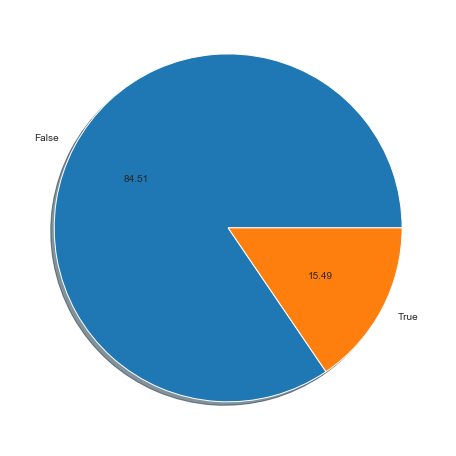

In [19]:
#visualisation
sns.set_style('darkgrid')
plt.figure(figsize=(8,8))
x= revenue.index
y = revenue.values
plt.pie(y,labels=x,autopct='%.2f',shadow = True)
plt.show()

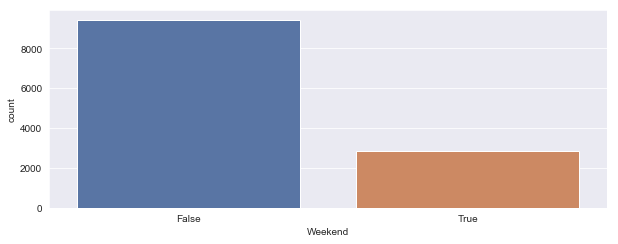

In [20]:
#people visiting on weekend or week 
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
sns.set(style="dark")
ax = sns.countplot(x="Weekend",data=df_clean)

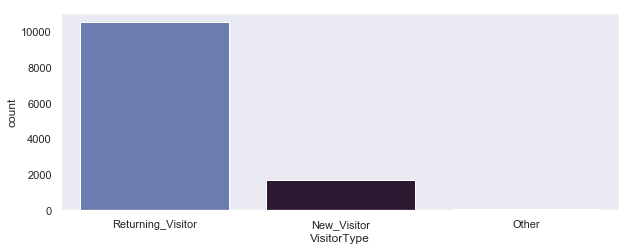

In [21]:
#type of visitor
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
sns.set(style="dark")
ax = sns.countplot(x="VisitorType", data=df_clean, palette = 'twilight')

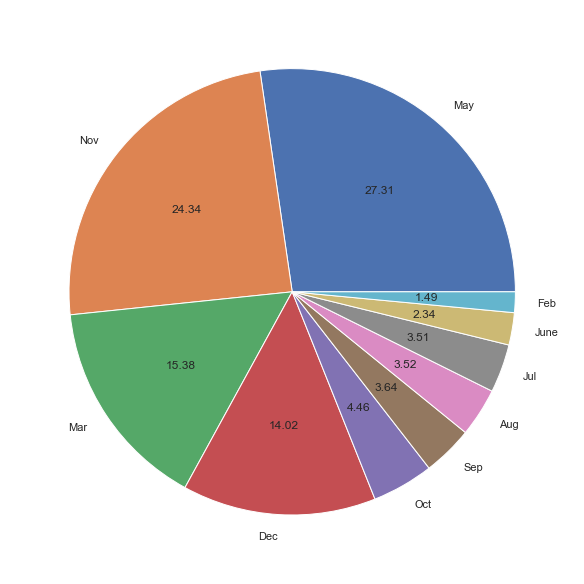

In [22]:
#by months
months_value=df_clean['Month'].value_counts()
sns.set_style('darkgrid')
plt.figure(figsize=(10,18))
x= months_value.index
y = months_value.values
plt.pie(y,labels=x,autopct='%.2f')
plt.show()

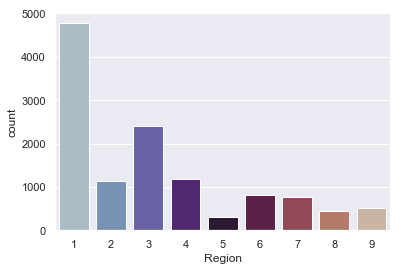

In [23]:
#by region
region = df_clean['Region']
ax = sns.countplot(x=df_clean['Region'],data=df_clean,palette = 'twilight')

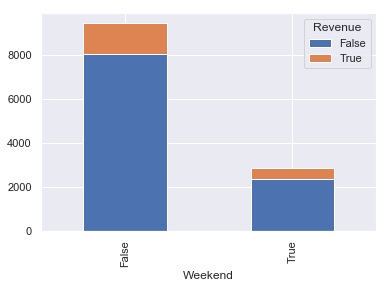

In [24]:
#week end = more revenue?: tableau croisé
df_cross= pd.crosstab(df_clean['Weekend'],df_clean['Revenue'])
df_cross.plot(kind='bar',stacked='true')
plt.show()

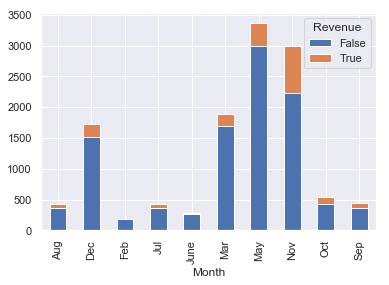

In [25]:
 #tableau croisé

df_cross= pd.crosstab(df_clean['Month'],df_clean['Revenue'])
df_cross.plot(kind='bar',stacked='true')

plt.show()


## analyses des données sur les pages KPI WEB

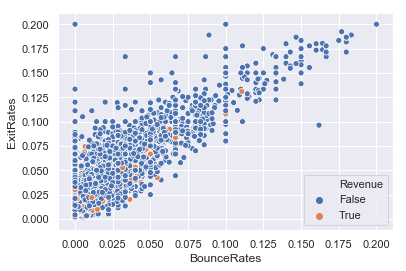

In [26]:
sns.scatterplot(x="BounceRates", y="ExitRates", hue="Revenue", data=df_clean)

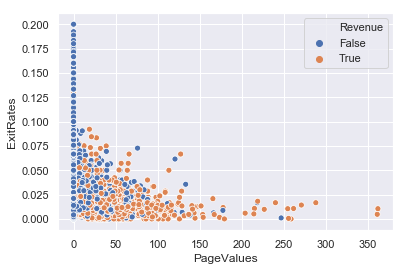

In [27]:
sns.scatterplot(x="PageValues", y="ExitRates", hue="Revenue", data=df_clean)

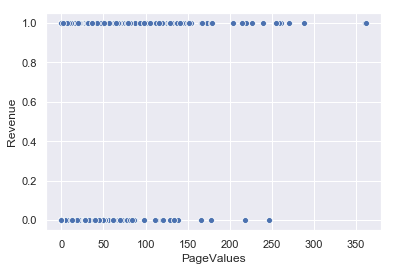

In [37]:
#les gens qui ont fait l'achat ont tendance à visiter des pages avec des valeurs plus grandes
sns.scatterplot(x="PageValues", y="Revenue", data=df_clean)

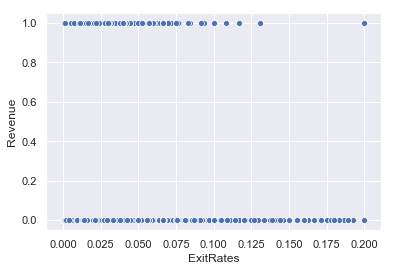

In [38]:
#les gens qui ont fait l'achat ont tendance à visiter des pages avec un exit rate plus bas 
sns.scatterplot(x="ExitRates", y="Revenue", data=df_clean)

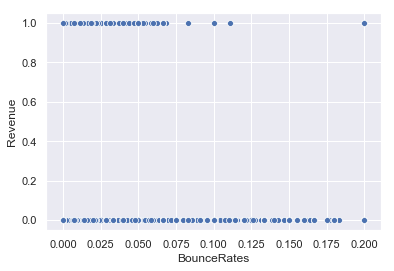

In [39]:
#les gens qui ont fait l'achat ont tendance à visiter des pages avec un BounceRate plus bas 
sns.scatterplot(x="BounceRates", y="Revenue", data=df_clean)

* 

## Implement SVM model

In [29]:
#transformation pour le model suppression des 
df_clean.drop(['Month', 'VisitorType'],axis=1, inplace=True)
df_all.drop(['Month', 'VisitorType'],axis=1, inplace=True)

### First trial with all the columns


In [30]:
# split dependent and independent variables
X = df_clean.drop(['Revenue'], axis=1)
y = df_clean['Revenue']

# split train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# initialize SVM instance
clf = LinearSVC(random_state=333)

# train the model
clf.fit(X_train, y_train)

C:\Users\Formation\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=333, tol=0.0001,
     verbose=0)

In [31]:
# use the trained model to predict
pred = clf.predict(X_test)


In [32]:
# calculate accuracy
print("accuracy score: ", (accuracy_score(y_test, pred)*100).round(2), "%")


accuracy score:  81.5 %


In [33]:
# split dependent and independent variables
X = df_all.drop(['Revenue'], axis=1)
y = df_all['Revenue']

# split train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# initialize SVM instance
clf = LinearSVC(random_state=333)

# train the model
clf.fit(X_train, y_train)

C:\Users\Formation\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=333, tol=0.0001,
     verbose=0)

In [34]:
# use the trained model to predict
pred = clf.predict(X_test)


In [35]:
# calculate accuracy
print("accuracy score: ", (accuracy_score(y_test, pred)*100).round(2), "%")


accuracy score:  81.5 %


## Essai avec réduction de dimensionalité

In [36]:
#data frame avec seulement les variables sur le comportement du consommateur
d = df_clean[''] 
new_df = pd.Dataframe(data = )

SyntaxError: invalid syntax (<ipython-input-36-b41a4b265d11>, line 2)